<a href="https://colab.research.google.com/github/ngoan22mse23088/TextMining/blob/master/TEM501_PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

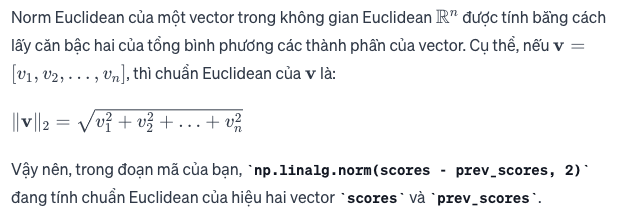

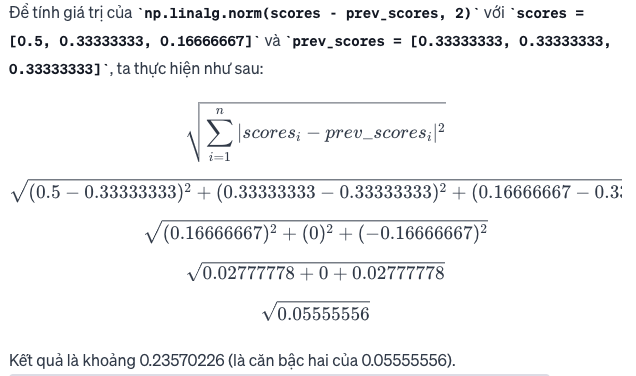

Matrix Formulation

In [14]:
import numpy as np

def pagerank(transition_matrix, epsilon=1e-8, max_iterations=100):
    """
    Tính toán PageRank cho một ma trận chuyển đổi.

    Tham số:
    - transition_matrix: Ma trận chuyển đổi.
    - epsilon: Ngưỡng dừng khi sự thay đổi giữa hai lần lặp liên tiếp nhỏ hơn epsilon.
    - max_iterations: Số lần lặp tối đa.

    Trả về:
    - Một vector chứa giá trị PageRank của từng nút (trang) trong ma trận chuyển đổi.
    """
    n = transition_matrix.shape[0]
    initial_scores = np.ones(n) / n  # Bắt đầu với PageRank đồng đều cho mỗi nút
    scores = initial_scores.copy()

    for step in range(max_iterations):
        prev_scores = scores.copy()
        scores = np.dot(transition_matrix, scores)

        # print('scores ' + str(scores) + ' prev_scores ', prev_scores)
        # print('Norm : ' + str(step) + ' = ', np.linalg.norm(scores - prev_scores, 2))
        if np.linalg.norm(scores - prev_scores, 2) < epsilon:
            break

    return step, scores

# Ví dụ sử dụng hàm với ma trận chuyển đổi cụ thể
transition_matrix = np.array([[0, 0.5, 1], [0.5, 0.5, 0], [0.5, 0, 0]])
step, pr_scores = pagerank(transition_matrix)
print('After interation ' + str(step) + ' -> PageRank: ', str(pr_scores))

After interation 81 -> PageRank:  [0.4 0.4 0.2]


PageRank: Damping Factor

In [15]:
import numpy as np

def pagerank(transition_matrix, damping_factor=0.85, epsilon=1e-8, max_iterations=100):
    n = transition_matrix.shape[0]
    initial_scores = np.ones(n) / n
    scores = initial_scores.copy()

    for step in range(max_iterations):
        prev_scores = scores.copy()
        scores = (damping_factor * np.dot(transition_matrix, scores)) + ((1 - damping_factor)/n)

        # print('scores ' + str(scores) + ' prev_scores ', prev_scores)
        # print('Norm : ' + str(step) + ' = ', np.linalg.norm(scores - prev_scores, 2))
        if np.linalg.norm(scores - prev_scores, 2) < epsilon:
            break

    return step, scores

# Ví dụ sử dụng hàm với ma trận chuyển đổi cụ thể
transition_matrix = np.array([[0, 0.5, 1], [0.5, 0.5, 0], [0.5, 0, 0]])
step, pr_scores = pagerank(transition_matrix)
print('After interation ' + str(step) + ' -> PageRank: ', str(pr_scores))

After interation 45 -> PageRank:  [0.39879457 0.38171773 0.2194877 ]


In [ ]:
import networkx as nx

def pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1.0e-8, nstart=None, weight='weight', dangling=None):
    if len(G) == 0:
        return {}

    D = G.to_directed() if not G.is_directed() else G

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()

    # Choose fixed starting vector if not given
    if nstart is None:
        x = {k: 1.0 / N for k in W}
    else:
        # Normalized nstart vector
        s = float(sum(nstart.values()))
        x = {k: v / s for k, v in nstart.items()}

    # Assign uniform personalization vector if not given
    if personalization is None:
        p = {k: 1.0 / N for k in W}
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary must have a value for every node. Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = {k: v / s for k, v in personalization.items()}

    # Use personalization vector if dangling vector not specified
    if dangling is None:
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary must have a value for every node. Missing nodes %s' % missing)
        s = float(sum(dangling.values()))
        dangling_weights = {k: v / s for k, v in dangling.items()}
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

    # Power iteration: make up to max_iter iterations
    for iter in range(max_iter):
        xlast = x.copy()
        x = {k: 0 for k in xlast}
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]

        # Check convergence, l1 norm
        err = sum(abs(x[n] - xlast[n]) for n in x)
        if err < N * tol:
            print('Iteration step: ' + str(iter))
            return x

    raise NetworkXError('pagerank: power iteration failed to converge in %d iterations.' % max_iter)


In [ ]:
import networkx as nx
import numpy as np

# Create the matrix
matrix = np.array([[0, 0.5, 1],
                   [0.5, 0.5, 0],
                   [0.5, 0, 0]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
num_nodes = matrix.shape[0]
G.add_nodes_from(range(num_nodes))

# Add edges to the graph based on the matrix values
for i in range(num_nodes):
    for j in range(num_nodes):
        weight = matrix[i][j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

pagerank(G)

Iteration step: 56


{0: 0.41907108150769445, 1: 0.29345531199933617, 2: 0.28747360649296905}